# **Statistic**
by Farah

1. Distribusi
2. Korelasi

## Preparation dan Load Data

In [1]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.3-py3-none-any.whl size=10545 sha256=80a2c47e3db8a9083d0b14e1c809d00a9c3820d2910a06abf536ab10f21ac149
  Stored in directory: /root/.cache/pip/wheels/be/4d/30/c131cf1cbb0046f14436cdd7a29f4cc8553d34754e3685d071
Successfully built empiricaldist


In [2]:
import pandas as pd
import numpy as np
from empiricaldist import Pmf, Cdf
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import io
from scipy.stats import pearsonr

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/FarahulJannah/dataset_compile/main/BankChurners.csv")
print(data.shape)
data.head()

(10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## **1. Distribusi dan Skewness**

1. Distribusi merupakan pesebaran data suatu variabel. Distribusi normal adalah distribusi probabilitas kontinu yang dicirikan oleh kurva berbentuk lonceng simetris (bell-shaped curve). Terlebih lagi, distribusi normal memiliki karakter dengan di pusatnya sebagai nilai rata-rata dan penyebarannya standar deviasi
2. Skewness menggambarkan bentuk dari distribusi. Terdapat 2 skewness, yaitu:
    - Left skewness ketika nilai memanjang ke kiri
    - Right skewness ketika nilai memanjang ke kanan


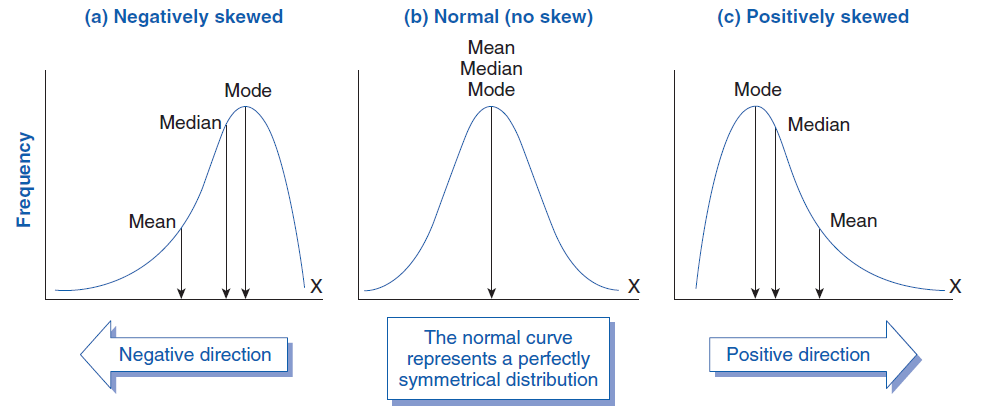

In [11]:
# Mengetahui kolom yang numerik

num_col = data.select_dtypes(include=['float64', "int64"]).columns
print(num_col)

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


In [14]:
# Menghitung Skewness kolom numerik

for col in num_col:
  print(col)
  skewness = data[col].skew().round(3)
  print(f"Skewness:", skewness)

CLIENTNUM
Skewness: 0.996
Customer_Age
Skewness: -0.034
Dependent_count
Skewness: -0.021
Months_on_book
Skewness: -0.107
Total_Relationship_Count
Skewness: -0.162
Months_Inactive_12_mon
Skewness: 0.633
Contacts_Count_12_mon
Skewness: 0.011
Credit_Limit
Skewness: 1.667
Total_Revolving_Bal
Skewness: -0.149
Avg_Open_To_Buy
Skewness: 1.662
Total_Amt_Chng_Q4_Q1
Skewness: 1.732
Total_Trans_Amt
Skewness: 2.041
Total_Trans_Ct
Skewness: 0.154
Total_Ct_Chng_Q4_Q1
Skewness: 2.064
Avg_Utilization_Ratio
Skewness: 0.718
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
Skewness: 1.849
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
Skewness: -1.849


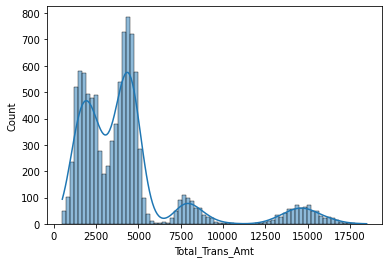

2.0410034025756936

In [15]:
# Melihat skewness pada kolom "Total_Trans_Amt"

sns.histplot (data = data, x='Total_Trans_Amt', kde=True)
plt.show()
data['Total_Trans_Amt'].skew()

Data pada kolom Total_Trans_Amt **tidak berdistribusi normal** dan termasuk dalam kategori **right skewness** dengan besaran skew-nya adalah 2.041

Data ini termasuk kategori right skewness dikarenakan nilai skew-nya lebih dari 0.

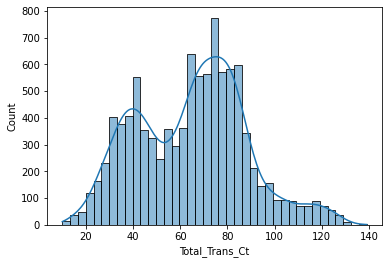

0.15367306849872275

In [16]:
# Melihat skewness pada kolom "Total_Trans_Ct"

sns.histplot (data = data, x='Total_Trans_Ct', kde=True)
plt.show()
data['Total_Trans_Ct'].skew()

Data pada kolom Total_Trans_Amt **tidak berdistribusi normal** dan termasuk dalam kategori **right skewness** dengan besaran skew-nya adalah 0.15

Data ini termasuk kategori right skewness dikarenakan nilai skew-nya lebih dari 0.

## **2. Korelasi**

Arah korelasi:
1. Korelasi positif: kedua variabel mempunyai arah yang sama
2. Korelasi normal: tidak ada hubungan antara kedua variabel
3. Korelasi negatif: variabel satu dengan yang lainnya memiliki arah yang berbeda

In [ ]:
# Convert dataframe into series
list1 = data['Total_Trans_Amt']
list2 = data['Total_Trans_Ct']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: 0.81


Nilai korelasi antara kolom "Total_Trans_Amt" dan "Total_Trans_Ct" adalah sebesar 0.81

Nilai ini menunjukkan bahwa korelasi yang terjadi adalah positif korelasi. Artinya semakin besar nilai Total Transaction Amount maka semakin besar pula nilai Total Transaction Count, begitu pula sebaliknya.

Scatter plot di bawah ini akan lebih menunjukkan bagaimana korelasi antar data tersebut.

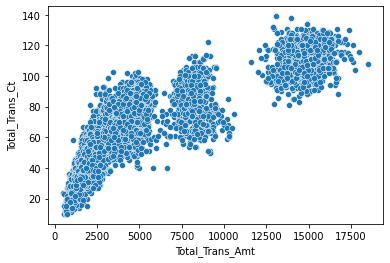

In [ ]:
sns.scatterplot(data = data, x='Total_Trans_Amt', y='Total_Trans_Ct')
plt.show()

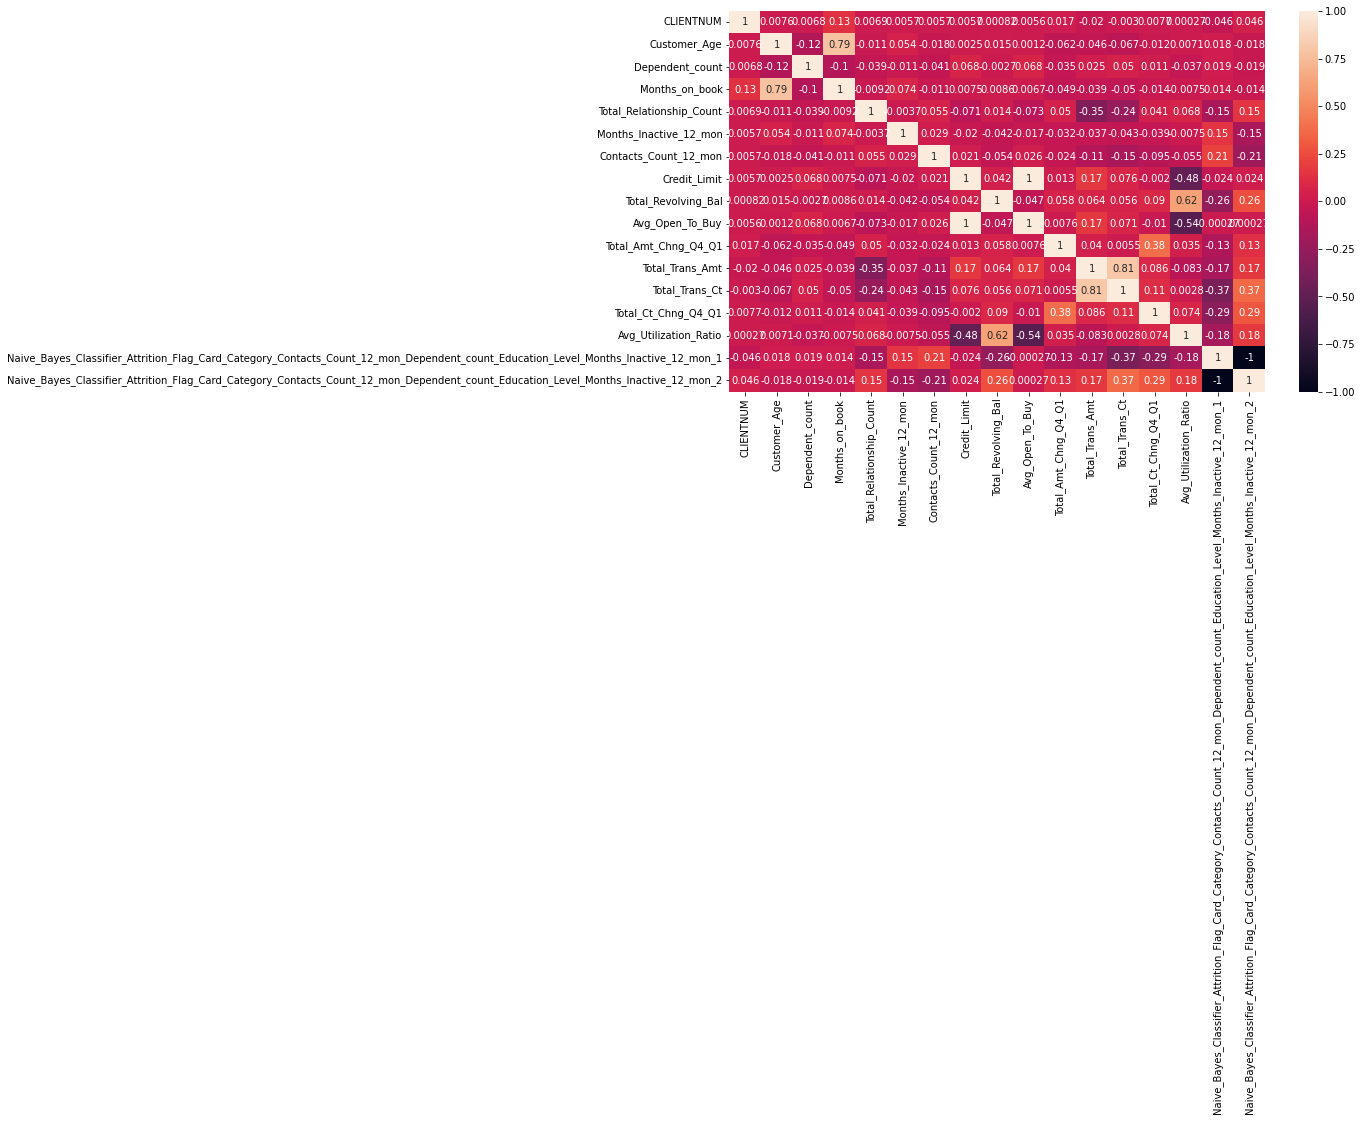

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True)
plt.show()